### Challenge: Validity of the A/B Test Findings


### Solution: Hypothesis Testing

In [66]:
#Importations
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

#allow plots to appear inline
%matplotlib inline

In [67]:
#Read data
data = pd.read_csv('data/test_table.csv')
data.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


### Is the non-localized translation really better?

In [68]:
selection = data['conversion'].groupby(data['test'])
selection.sum()

test
0    13096
1     9379
Name: conversion, dtype: int64

In [69]:
selection.mean()

test
0    0.055179
1    0.043425
Name: conversion, dtype: float64

### On the surface - Yes. 
The average conversion rate for the old translation is better at 5.5% while the average conversion rate for the new translation is 4.34%

### But, is this statistically significant?
Perform a t-test to find out.

In [70]:
#By setting equal_var = False, we perform Welch’s t-test, which does not assume equal population variance.
# ttest = stats.ttest_ind(selection.get_group(0),selection.get_group(1), equal_var = False)
ttest = stats.ttest_1samp(selection.get_group(0),0.043425)
ttest

Ttest_1sampResult(statistic=25.078204166483914, pvalue=1.3053007023803582e-138)

ValueError: First argument must be a sequence

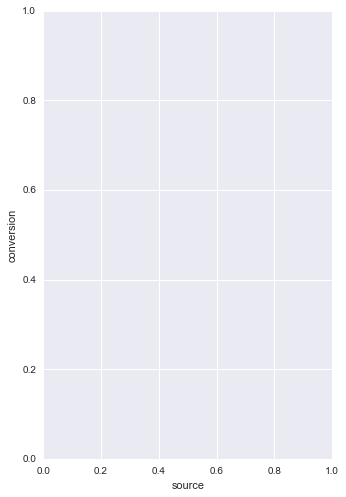

In [72]:

# df = data[['source','device','browser_language','ads_channel','browser','conversion']]
# df1 = pd.get_dummies(df, prefix=['source','device','browser_language','ads_channel','browser'])
# sns.pairplot(data,x_vars=['source'],y_vars='conversion',size=7, aspect =0.7)

# #type(data)

Algorithm to automate some steps.


1.Create a function that calculates the significance level for each result of the AB Test
2.Pass all results of the AB Test through this function.